## Evaluating Cricket data using numpy

In [ ]:
#Importing data using numpy
import numpy as np
data=np.loadtxt(r"F:\Padhai\Numpy\cric.tsv",skiprows=1)

In [2]:
# Removing unwanted column
data=data[:,[1,2,3]]

In [3]:
# Checking the type of data
print(type(data))

<class 'numpy.ndarray'>


In [4]:
#Getting dimension of data
data.shape

(225, 3)

In [5]:
# Naming the data score wise 
sachin=data[:,0]
rahul=data[:,1]
India=data[:,2]

In [ ]:
#1. Find mean, median, IQR for Sachin, Rahul, and India

In [6]:
def stat(col):
    print('Mean',np.mean(col))
    print('Median',np.median(col))
    print('IQR',np.percentile(col,75)-np.percentile(col,25))

In [7]:
stat(sachin)

Mean 39.87555555555556
Median 27.0
IQR 57.0


In [8]:
stat(rahul)

Mean 32.062222222222225
Median 22.0
IQR 46.0


In [9]:
stat(India)

Mean 220.79555555555555
Median 216.0
IQR 98.0


In [ ]:
# 2.Find the histogram of Sachin's scores with 10 bins.

In [10]:
# Histogram using numpy
np.histogram(sachin)

(array([99, 36, 28, 16, 11, 17,  8,  8,  1,  1], dtype=int64),
 array([  0. ,  18.6,  37.2,  55.8,  74.4,  93. , 111.6, 130.2, 148.8,
        167.4, 186. ]))

(array([99., 36., 28., 16., 11., 17.,  8.,  8.,  1.,  1.]),
 array([  0. ,  18.6,  37.2,  55.8,  74.4,  93. , 111.6, 130.2, 148.8,
        167.4, 186. ]),
 <BarContainer object of 10 artists>)

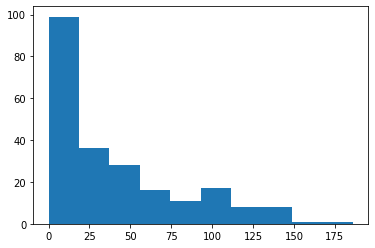

In [11]:
# np.histogram() is similar to plt.hist() in matplotlib
from matplotlib import pyplot as plt
plt.hist(sachin)

In [ ]:
# 3.Find mean of Sachin's scores grouped by 25 matches.

In [12]:
sachin.shape

(225,)

In [13]:
# Arranging the data in 25*9 form
sachin_25=sachin.reshape(25,9)
sachin_25

array([[100.,  11.,   8.,  71., 104.,  18.,   8.,  86.,  12.],
       [ 85.,  18.,   4.,   7.,  37.,  14.,   0.,   4.,   0.],
       [ 21.,   1.,  62.,   0., 138.,  38.,   2.,  46.,  65.],
       [  0.,  39.,  48., 141.,  62.,  12.,   1.,  41.,  11.],
       [  3., 186.,  11.,  27.,  27.,  51.,  18.,  32., 146.],
       [  5.,  45., 141.,  12.,  65.,  27.,   7.,  16.,   2.],
       [ 28.,   6., 123., 120.,   7.,   3.,   0.,  81.,   2.],
       [ 54., 122.,   4.,  14.,   0., 100.,  15.,   0.,  57.],
       [ 99.,  37.,  38.,  32.,  21.,  32.,  40.,   0.,   5.],
       [  8.,   5.,   0.,  50.,  30.,  37.,  89.,   4.,  98.],
       [ 83.,  93.,   0.,  52., 152.,   1.,   8.,  93.,  45.],
       [ 26.,   0.,   1.,   0.,  16.,  47.,  89.,   3.,   1.],
       [ 53.,  16.,   0.,  81.,  14.,  78.,   6., 105., 122.],
       [  9.,   8.,  28.,  35.,  69.,  13.,  97.,  93.,   2.],
       [ 36.,  39.,   2.,  29.,  12.,  19.,  34.,   2., 100.],
       [ 44.,  82.,   0.,  79.,   6.,   9.,   8.,  23.,

In [14]:
sachin_25.reshape(25,9).shape

(25, 9)

In [15]:
# Finding the mean of data column wise.
np.mean(sachin_25,axis=0)

array([37.04, 45.44, 40.24, 44.76, 51.32, 28.52, 37.88, 32.28, 41.4 ])

In [ ]:
#4. Find mean of Sachin's scores where he has scored a century.

In [16]:
np.mean(sachin[sachin>=100])

125.0

In [ ]:
#5. Find mean of Sachin's scores when Rahul has scored less than 10.

In [17]:
np.mean(sachin[rahul<=10])

40.2112676056338

In [18]:
#6. Find mean for Sachin's scores based on which quartile India's score falls in.

In [19]:
#Finding percentiles score of India.
ind_percentile=np.percentile(India,[25,50,75,100])
ind_percentile

array([175., 216., 273., 499.])

In [21]:
India.shape

(225,)

In [22]:
ind_percentile.shape

(4,)

In [23]:
# Rearranging the array for bradcasting purpose
quar=ind_percentile.reshape(4,1)
quar

array([[175.],
       [216.],
       [273.],
       [499.]])

In [24]:
indices=India<quar

In [25]:
indices.shape

(4, 225)

In [26]:
sachin[indices[1,:]]

array([ 11.,  18.,  14.,   4.,   0.,  21.,  62.,   2.,  46.,  65.,   0.,
        39.,  48.,   3.,  11.,   5.,  65.,  27.,   7.,   2.,  28.,   6.,
         7.,   3.,   2.,   4., 100.,  15.,  32.,  40.,   0.,   5.,   8.,
         5.,   0.,  30.,  37.,  89.,   0.,  52.,  93.,  45.,   0.,   1.,
         0.,   3.,   0.,  81.,  78.,   6.,  28.,  13.,  93.,   2.,  36.,
         2.,  12.,  19.,  34.,   2.,  82.,   0.,   6.,   8.,  23.,  35.,
        74., 117.,  49.,  64.,   5.,  17.,   0.,  44.,  68.,   3.,  47.,
        17.,  35.,  88., 127.,   0.,  45.,  33., 110.,   7.,  25.,   9.,
         2.,  11.,  17.,   1.,  45.,   9.,  67.,  10.,  55.,   0.,   1.,
       101.,  23.,   1.,  41.,   1.,  28.,   2.,  22.,  25.,   0.,  27.,
        40.])

In [27]:
# Mean of Sachin's score based on Indias percentile score
for i in range(4):
    print(i, np.mean(sachin[indices[i]]))

0 19.672727272727272
1 28.18018018018018
2 31.688622754491018
3 39.799107142857146


In [28]:
#7.For every match find out who has has scored more - Sachin or Rahul

In [29]:
scr=sachin>rahul
scr

array([ True, False, False,  True,  True, False, False,  True, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True, False,

In [30]:
np.where(scr==True,'sachin','rahul')

array(['sachin', 'rahul', 'rahul', 'sachin', 'sachin', 'rahul', 'rahul',
       'sachin', 'rahul', 'sachin', 'rahul', 'rahul', 'rahul', 'sachin',
       'sachin', 'rahul', 'rahul', 'rahul', 'rahul', 'rahul', 'sachin',
       'rahul', 'sachin', 'sachin', 'rahul', 'sachin', 'sachin', 'rahul',
       'sachin', 'sachin', 'sachin', 'sachin', 'rahul', 'rahul', 'sachin',
       'rahul', 'rahul', 'sachin', 'rahul', 'sachin', 'sachin', 'sachin',
       'sachin', 'rahul', 'sachin', 'rahul', 'rahul', 'sachin', 'rahul',
       'sachin', 'rahul', 'rahul', 'rahul', 'rahul', 'sachin', 'rahul',
       'sachin', 'sachin', 'rahul', 'rahul', 'rahul', 'sachin', 'rahul',
       'sachin', 'sachin', 'sachin', 'sachin', 'rahul', 'sachin', 'rahul',
       'rahul', 'sachin', 'sachin', 'rahul', 'rahul', 'sachin', 'rahul',
       'rahul', 'sachin', 'rahul', 'rahul', 'rahul', 'rahul', 'rahul',
       'rahul', 'sachin', 'sachin', 'sachin', 'rahul', 'sachin', 'sachin',
       'sachin', 'rahul', 'sachin', 'sachin', '